# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,3.664639,5.509711,6.099392
1,3.626865,7.442251,6.088060
2,0.793014,4.395107,5.237904
3,-1.058700,3.968678,4.682390
4,1.641287,4.609642,5.492386


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

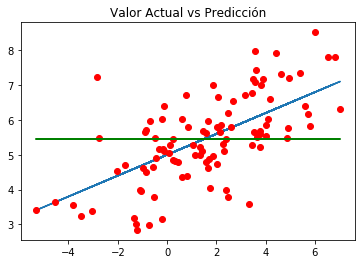

In [11]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [12]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.664639,5.509711,6.099392,0.423781,0.347723,0.003758
1,3.626865,7.442251,6.088060,0.409155,1.833833,3.975412
2,0.793014,4.395107,5.237904,0.044311,0.710307,1.109441
3,-1.058700,3.968678,4.682390,0.586782,0.509385,2.189598
4,1.641287,4.609642,5.492386,0.001934,0.779238,0.703528


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

59.32925790104968

In [16]:
SSD

89.6826181269359

In [17]:
SST

157.1671704510943

In [18]:
SSR+SSD

149.01187602798558

In [19]:
R2 = SSR/SST

In [20]:
R2

0.3774914171373414

(array([ 1.,  0.,  6., 11., 15., 22., 27.,  9.,  7.,  2.]),
 array([-3.08429091, -2.53367122, -1.98305153, -1.43243184, -0.88181216,
        -0.33119247,  0.21942722,  0.77004691,  1.3206666 ,  1.87128629,
         2.42190598]),
 <a list of 10 Patch objects>)

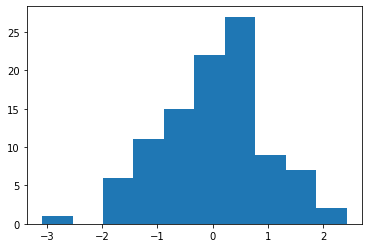

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.5550466566795513, 5.448407085473458)

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(4.949554323991835, 0.3207960091350633)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.664639,5.509711,6.099392,0.423781,0.347723,0.003758,0.129327,4.450379,6.125156
1,3.626865,7.442251,6.088060,0.409155,1.833833,3.975412,4.130882,4.292433,6.113038
2,0.793014,4.395107,5.237904,0.044311,0.710307,1.109441,0.802649,0.580694,5.203950
3,-1.058700,3.968678,4.682390,0.586782,0.509385,2.189598,3.867637,6.831670,4.609928
4,1.641287,4.609642,5.492386,0.001934,0.779238,0.703528,-0.072336,0.007437,5.476073


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(67.80227370576338, 89.36489674533084, 157.16717045109428)

In [31]:
R2 = SSR / SST
R2

0.43140226747838173

Text(0.5, 1.0, 'Valor Actual vs Predicción')

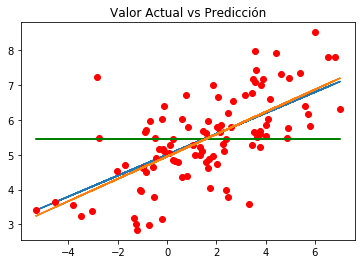

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.9549275896542981

In [34]:
np.mean(data["y_actual"])

5.448407085473458

In [35]:
RSE / np.mean(data["y_actual"])

0.1752672982531584